<a href="https://colab.research.google.com/github/dhia-eddine-jedidi/AlFouladhInternship/blob/main/Arabic_Documents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Humans in the Loop **call**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("humansintheloop/arabic-documents-ocr-dataset")

print("Path to dataset files:", path)

 80%|████████  | 7.15G/8.88G [04:05<00:59, 31.1MB/s]

SARD

In [ ]:
!pip install -q datasets


In [ ]:
from datasets import load_dataset

ds = load_dataset("riotu-lab/SARD-Extended", streaming=True)
print(ds)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


IterableDatasetDict({
    Amiri: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Sakkal_Majalla: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Arial: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Calibri: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Scheherazade_New: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Jozoor_Font: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Al_Jazeera_Arabic_Regular: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Lateef: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Noto_Naskh_Arabic_UI: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
    Thabit: IterableDataset({
        features: Unknown,
        num_shards: 5
    })
})


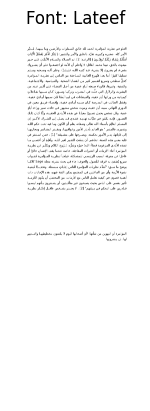

Text: الغلو في نظرية المؤامرة الحمد لله خالقِ السماوات والأرضين وما بينهما، مُدبِّر الأمر كله، صغيره وكبيره، تفرَّد بالخلق والأمر والتدبير: ﴿ يُدَبِّرُ الْأَمْرَ يُفَصِّلُ الْآيَاتِ لَعَلَّكُمْ بِلِقَاءِ رَبِّكُمْ تُوقِنُونَ ﴾ [الرعد: 2]، ثم الصلاة والسلام الأتمَّان على خير مبعوث بالحق، نبينا محمد القائل: ((واعلم أن الأمة لو اجتمعوا على أن يضروك بشيء، لم يضروك إلا بشيء، قد كتبه الله عليك))، وعلى آله وصحبه وسلم تسليمًا كثيرًا؛ أما بعد: فتُهرع الغالبية الساحقة من الناس إلى نظرية المؤامرة كحلٍّ سطحي وسريع لتفسير كثير من القضايا الصحية، والسياسية، والاجتماعية، والدينية، وغيرها، فالوباء صنعته أيادٍ خفية من أجل القضاء على أكبر عدد من البشرية، والزلازل التي حلَّت في المغرب وتركيا وسوريا كان سببها تفاعلاتٍ كيميائية من ورائها أيادٍ خفية، والفيضانات في ليبيا أيضًا كان سببها أياديَ خفية، وفشل الطالب في المدرسة كان سببه أيادي خفية، وإقصاء فريق معين في الدوري النهائي سببه أيادٍ خفية، وموت شخص مشهور في حادث سير وراءه أيادٍ خفية، وكل شخص يحمل تصورًا معينًا عن هذه الأيادي الخفية، وأيًّا كان ذلك التصور

In [ ]:
from datasets import load_dataset
from PIL import Image
import base64
from io import BytesIO
import matplotlib.pyplot as plt

ds = load_dataset("riotu-lab/SARD-Extended", streaming=True)

# Pick any font split, e.g., "Lateef"
sample = next(iter(ds["Lateef"]))

# Decode and show image
image_data = base64.b64decode(sample["image_base64"])
image = Image.open(BytesIO(image_data))

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title(f"Font: {sample['font_name']}")
plt.show()

print("Text:", sample["chunk"])


#Fusion of both datasets

In [ ]:
# Install dependencies
!pip install kagglehub datasets pandas pillow

import os
import json
import pandas as pd
from pathlib import Path
from datasets import load_dataset
from PIL import Image
import warnings

In [ ]:
# Suppress PIL warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Set up directories
base_dir = "/content/arabic_ocr_data"  # Adjust to "/kaggle/working/" if in Kaggle
os.makedirs(base_dir, exist_ok=True)

# --- Step 1: Process Arabic Documents OCR Dataset (Humans in the Loop) ---
hitl_path = "/kaggle/input/arabic-documents-ocr-dataset/Documents/Book"  # Updated path for Kaggle
hitl_data = []

# Verify base directory
if not os.path.exists(hitl_path):
    print(f"Error: Base directory not found at {hitl_path}")
    exit()

# Inspect the root directory structure
print("Inspecting dataset structure...")
root_contents = os.listdir(hitl_path)
print(f"Root contents: {root_contents}")

# Recursive search for img and ann directories
def find_img_ann_directories(base_path):
    img_dir = None
    ann_dir = None
    for item in os.listdir(base_path):
        item_path = os.path.join(base_path, item)
        if os.path.isdir(item_path):
            if item.lower() in ["img", "images"]:
                img_dir = item_path
            elif item.lower() in ["ann", "annotations"]:
                ann_dir = item_path
            # Recursive search if not found yet
            if not img_dir or not ann_dir:
                sub_img, sub_ann = find_img_ann_directories(item_path)
                if sub_img:
                    img_dir = sub_img
                if sub_ann:
                    ann_dir = sub_ann
    return img_dir, ann_dir

# Search for img and ann in root and subdirectories
img_dir, ann_dir = find_img_ann_directories(hitl_path)
if img_dir and ann_dir:
    print(f"Found img: {img_dir} and ann: {ann_dir}")
    for json_file in os.listdir(ann_dir):
        if json_file.endswith(".json"):
            json_path = os.path.join(ann_dir, json_file)
            image_name = os.path.splitext(json_file)[0] + ".jpg"  # Assume JPG format
            image_path = os.path.join(img_dir, image_name)
            if os.path.exists(image_path):
                try:
                    with open(json_path, "r", encoding="utf-8") as f:
                        annotations = json.load(f)
                    # Concatenate all text regions (Body text, Title)
                    text_labels = [
                        obj["text"] for obj in annotations.get("objects", [])
                        if obj.get("class") in ["Body text", "Title"] and "text" in obj
                    ]
                    combined_text = " ".join(text_labels).strip()
                    if combined_text:  # Ensure non-empty label
                        hitl_data.append({
                            "image_path": image_path,
                            "label": combined_text
                        })
                except Exception as e:
                    print(f"Error processing {json_file}: {e}")
else:
    print("Warning: No img or ann directories found in the dataset. Please check the structure or dataset content.")

hitl_df = pd.DataFrame(hitl_data)
print(f"Arabic Documents samples: {len(hitl_df)}")


Error: Base directory not found at /kaggle/input/arabic-documents-ocr-dataset/Documents/Book
Inspecting dataset structure...


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/arabic-documents-ocr-dataset/Documents/Book'